In [ ]:
# for the CNN
import numpy as np
import keras
import matplotlib.pyplot as plt
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D

In [ ]:
def create_model(regularizer, initializer, activation='relu',optimizer='adam'):
    model = Sequential()
    model.add(Conv1D( filters = 5, kernel_size = 11,
                 kernel_regularizer = regularizer,
                 kernel_initializer = initializer,
                 activation = activation,
                 input_shape = input_shape
                ))
    model.add(AveragePooling1D(5))
    model.add(Conv1D(filters = 3, kernel_size = 7, activation = activation))
    model.add(Flatten())
    model.add(Dense(10, activation = activation))
    model.add(Dropout(0.2))
    model.add(Dense(N_categ, activation = 'softmax' ))
    
    print(model.summary())

    model.compile(loss = keras.losses.categorical_crossentropy,
             optimizer = optimizer, metrics = ['accuracy'])
    
    return model

# 3) Different CNN
Analysis of different CNN to check the scaling of the number of parameters adding Dense or Conv1D layer.

In [ ]:
str0 = 'ts_comp_N10000'
fnamex = 'DATA2/x_' + str0 + '.csv'
fnamey = 'DATA2/y_' + str0 + '.csv'

x = np.loadtxt(fnamex, delimiter = ',' ,dtype = float)
N = len(x)

xm = x.mean(axis=1) 
for n in range(N):
    x[n] = x[n] - xm[n]
    
xstd = x.std(axis = 1)
for n in range(N):
    x[n] = x[n] / xstd[n]


categ = np.loadtxt(fnamey ,delimiter = ',', dtype = int)

N_categ = 3
y = np.zeros((N,N_categ))

for n in range(N):
    y[n][categ[n]] = 1.

perc_train = 0.8
N_train = int(N*perc_train)
N_val = N - N_train
x_train = x[:N_train]
y_train = y[:N_train]
x_val = x[N_train:]
y_val = y[N_train:]

L = len(x[0])
print(N, N_train, N_val, L)

10000 8000 2000 60


### DATA reshaping

In [ ]:
print('shape before: ',x_train.shape)
x_train = x_train.reshape(x_train.shape[0],L,1)
print('shape after: ',x_train.shape)
x_val = x_val.reshape(x_val.shape[0],L,1)
input_shape = (L,1)

batch_size = 250
epochs = 250

shape before:  (8000, 60)
shape after:  (8000, 60, 1)


### Convolutional NN

Adam with regularizer L1

In [ ]:
from tensorflow.keras import initializers, regularizers
from tensorflow.keras import optimizers

regl1 = regularizers.l1(0.01)
np.random.seed(12345)
ini = initializers.RandomNormal(mean = 0, stddev = 0.05)
opt = optimizers.SGD(lr = 0.01, momentum = 0.9, nesterov = True, decay = 1e-6)
model = create_model(regl1,ini)

fit = model.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d (AveragePo (None, 10, 5)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 4, 3)              108       
_________________________________________________________________
flatten (Flatten)            (None, 12)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                130       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 3

Let's create another CNN with just one convolutional layer.

In [ ]:
model1 = Sequential()
model1.add(Conv1D( filters = 5, kernel_size = 11,
             kernel_regularizer = regl1,
             kernel_initializer = ini,
             activation = 'relu',
             input_shape = input_shape
            ))
model1.add(AveragePooling1D(5))
model1.add(Flatten())
model1.add(Dense(10, activation = 'relu'))
model1.add(Dropout(0.2))
model1.add(Dense(N_categ, activation = 'softmax' ))
    
print(model1.summary())

# compile model
model1.compile(loss = keras.losses.categorical_crossentropy,
optimizer = 'adam', metrics = ['accuracy'])


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_1 (Average (None, 10, 5)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 33        
Total params: 603
Trainable params: 603
Non-trainable params: 0
________________________________________________________

In [ ]:
fit1 = model1.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

In [ ]:
model2 = Sequential()
model2.add(Conv1D( filters = 5, kernel_size = 11,
             kernel_regularizer = regl1,
             kernel_initializer = ini,
             activation = 'relu',
             input_shape = input_shape
            ))
model2.add(AveragePooling1D(5))
model2.add(Flatten())
model2.add(Dense(5, activation = 'relu'))
model2.add(Dense(4, activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(Dense(N_categ, activation = 'softmax' ))
    
print(model2.summary())

# compile model
model2.compile(loss = keras.losses.categorical_crossentropy,
optimizer = 'adam', metrics = ['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_2 (Average (None, 10, 5)             0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 255       
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 24        
_________________________________________________________________
dropout_2 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                

In [ ]:
fit2 = model2.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

In [ ]:
model3 = Sequential()
model3.add(Conv1D( filters = 5, kernel_size = 11,
             kernel_regularizer = regl1,
             kernel_initializer = ini,
             activation = 'relu',
             input_shape = input_shape
            ))
model3.add(AveragePooling1D(5))
model3.add(Flatten())
model3.add(Dense(7, activation = 'relu'))
model3.add(Dense(7, activation = 'relu'))
model3.add(Dense(6, activation = 'relu'))
model3.add(Dense(5, activation = 'relu'))
model3.add(Dense(4, activation = 'relu'))
model3.add(Dropout(0.2))
model3.add(Dense(N_categ, activation = 'softmax' ))
    
print(model3.summary())

# compile model
model3.compile(loss = keras.losses.categorical_crossentropy,
optimizer = 'adam', metrics = ['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_3 (Average (None, 10, 5)             0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 50)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 7)                 357       
_________________________________________________________________
dense_8 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_9 (Dense)              (None, 6)                 48        
_________________________________________________________________
dense_10 (Dense)             (None, 5)                

In [ ]:
fit3 = model3.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

/shared-libs/python3.6/py-core/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


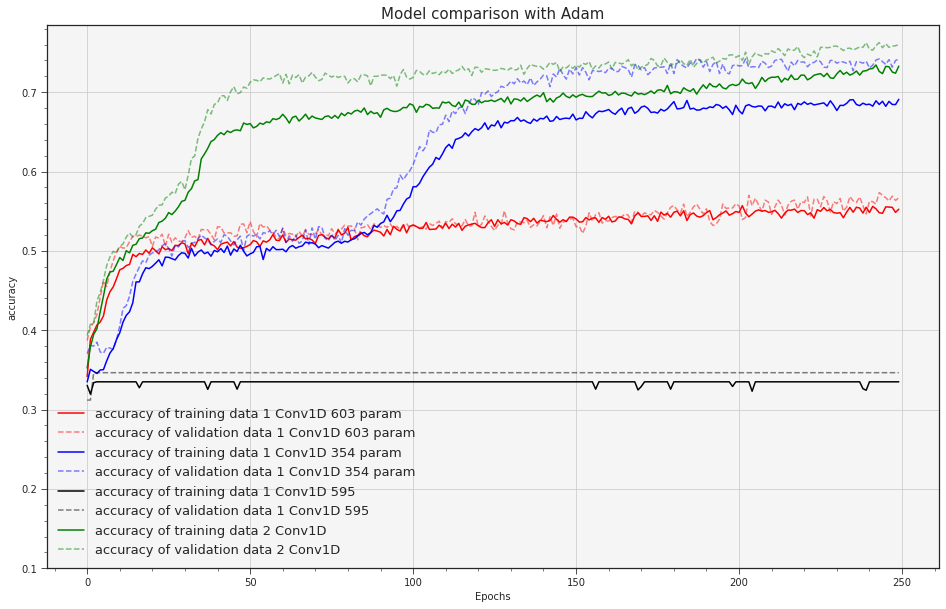

/shared-libs/python3.6/py-core/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


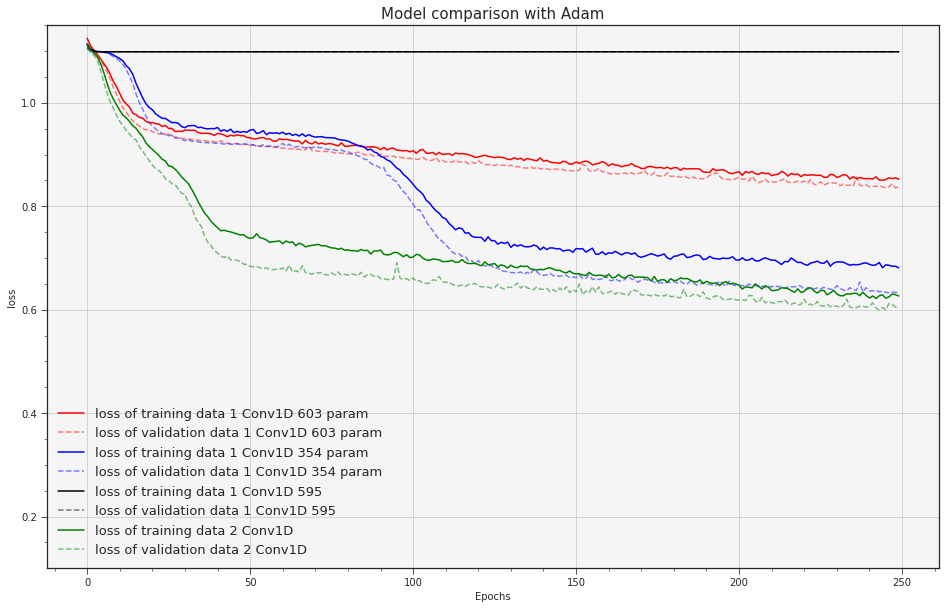

In [ ]:
for obs in ('accuracy', 'loss'):
    
    plt.figure(figsize=(16,10))
    plt.xticks()
    plt.minorticks_on()
    plt.style.use('seaborn-ticks')
    ax = plt.axes()
    ax.set_facecolor("whitesmoke")
    plt.grid()

    plt.plot(fit1.history[obs], 'r', label = obs +' of training data 1 Conv1D 603 param')
    plt.plot(fit1.history['val_' + obs], 'r--', label = obs + ' of validation data 1 Conv1D 603 param', alpha=0.5)
    plt.plot(fit2.history[obs], 'b', label = obs +' of training data 1 Conv1D 354 param')
    plt.plot(fit2.history['val_' + obs], 'b--', label = obs + ' of validation data 1 Conv1D 354 param', alpha=0.5)
    plt.plot(fit3.history[obs], 'k', label = obs +' of training data 1 Conv1D 595')
    plt.plot(fit3.history['val_' + obs], 'k--', label = obs + ' of validation data 1 Conv1D 595', alpha=0.5)
    plt.plot(fit.history[obs], 'g', label = obs +' of training data 2 Conv1D')
    plt.plot(fit.history['val_' + obs], 'g--', label = obs + ' of validation data 2 Conv1D', alpha=0.5)
    plt.title('Model comparison with Adam', fontsize=15)
    plt.ylabel(obs)
    plt.xlabel('Epochs')
    plt.ylim(ymin=0.1)
    plt.legend(fontsize=13,loc='best')
    plt.show()


Adding Conv1D layer the number of parameters decreases, while adding Dense layer such number increases.

The speed of this variation in the number of parameters, in the case of the Dense layer, depends on the parameter neurons, which is the size of the output space.

We have tried $3$ different models (with just one Conv1D layer) plus the original one (with two Conv1D layers). Each model has different Dense layer inside and so different number of trainable parameters. On the accuracy side, the best model is the one equals to the original one but without a convolutional layer. On the loss side, the best model is the original one. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fe671672-af6a-4685-87e3-e4b820a4c76e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>